In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Bidirectional
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the data
df = pd.read_csv(r'C:\Users\marie\OneDrive\Desktop\ml2\data1.csv')

# Separate features and targets
X = df['Clean_text'].values
# Get all columns except Clean_text
emotion_columns = [col for col in df.columns if col != 'Clean_text']
y = df[emotion_columns].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text
max_words = 100000  # Maximum vocabulary size
max_len = 100      # Maximum sequence length
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Model parameters
embedding_dim = 128
num_emotions = y_train.shape[1]  # Number of emotion categories

# Build the model using Functional API
input_layer = Input(shape=(max_len,))
x = Embedding(max_words, embedding_dim)(input_layer)
x = Dropout(0.2)(x)
x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = Bidirectional(LSTM(32))(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(num_emotions, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [11]:
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 200, 128)       │    12,800,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 200, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 200, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 28)             │         1,820 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,946,012 (49.39 MB)

 Trainable params: 12,946,012 (49.39 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)


Epoch 1/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 230s 257ms/step - accuracy: 0.2601 - loss: 0.1972 - val_accuracy: 0.3782 - val_loss: 0.1328
Epoch 2/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 221s 254ms/step - accuracy: 0.3987 - loss: 0.1306 - val_accuracy: 0.4542 - val_loss: 0.1190
Epoch 3/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 217s 249ms/step - accuracy: 0.4564 - loss: 0.1158 - val_accuracy: 0.4616 - val_loss: 0.1141
Epoch 4/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 228s 262ms/step - accuracy: 0.5039 - loss: 0.1043 - val_accuracy: 0.4714 - val_loss: 0.1116
Epoch 5/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 255s 293ms/step - accuracy: 0.5554 - loss: 0.0938 - val_accuracy: 0.4718 - val_loss: 0.1118
Epoch 6/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 308s 346ms/step - accuracy: 0.6008 - loss: 0.0845 - val_accuracy: 0.4595 - val_loss: 0.1156
Epoch 7/10
869/869 ━━━━━━━━━━━━━━━━━━━━ 293s 337ms/step - accuracy: 0.6470 - loss: 0.0759 - val_accuracy: 0.4521 - val_loss: 0.1178


In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

 38/272 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - accuracy: 0.4522 - loss: 0.1134

272/272 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.4668 - loss: 0.1134
Test Loss: 0.1135
Test Accuracy: 0.4650


In [14]:
# Make predictions
y_pred = model.predict(X_test_pad)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

 85/272 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step

272/272 ━━━━━━━━━━━━━━━━━━━━ 22s 74ms/step


In [15]:
# Print classification report
print("\nClassification Report:")
for i, emotion in enumerate(emotion_columns):
    print(f"\n{emotion}:")
    report = classification_report(y_test[:, i], y_pred_binary[:, i])
    print(report)



Classification Report:

admiration:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7819
           1       0.69      0.54      0.61       863

    accuracy                           0.93      8682
   macro avg       0.82      0.76      0.78      8682
weighted avg       0.92      0.93      0.93      8682


amusement:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8229
           1       0.74      0.75      0.74       453

    accuracy                           0.97      8682
   macro avg       0.86      0.87      0.86      8682
weighted avg       0.97      0.97      0.97      8682


anger:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8359
           1       0.00      0.00      0.00       323

    accuracy                           0.96      8682
   macro avg       0.48      0.50      0.49      8682
weighted avg     

c:\Users\marie\anaconda3\envs\textenv2\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marie\anaconda3\envs\textenv2\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marie\anaconda3\envs\textenv2\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8470
           1       0.00      0.00      0.00       212

    accuracy                           0.98      8682
   macro avg       0.49      0.50      0.49      8682
weighted avg       0.95      0.98      0.96      8682


confusion:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8424
           1       0.00      0.00      0.00       258

    accuracy                           0.97      8682
   macro avg       0.49      0.50      0.49      8682
weighted avg       0.94      0.97      0.96      8682


curiosity:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8222
           1       0.69      0.02      0.05       460

    accuracy                           0.95      8682
   macro avg       0.82      0.51      0.51      8682
weighted avg       0.93      0.95      0.92      8

c:\Users\marie\anaconda3\envs\textenv2\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marie\anaconda3\envs\textenv2\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marie\anaconda3\envs\textenv2\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8299
           1       0.00      0.00      0.00       383

    accuracy                           0.96      8682
   macro avg       0.48      0.50      0.49      8682
weighted avg       0.91      0.96      0.93      8682


disgust:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8526
           1       0.00      0.00      0.00       156

    accuracy                           0.98      8682
   macro avg       0.49      0.50      0.50      8682
weighted avg       0.96      0.98      0.97      8682


embarrassment:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8624
           1       0.00      0.00      0.00        58

    accuracy                           0.99      8682
   macro avg       0.50      0.50      0.50      8682
weighted avg       0.99      0.99      0.99     

c:\Users\marie\anaconda3\envs\textenv2\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marie\anaconda3\envs\textenv2\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marie\anaconda3\envs\textenv2\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8368
           1       0.69      0.26      0.38       314

    accuracy                           0.97      8682
   macro avg       0.83      0.63      0.68      8682
weighted avg       0.96      0.97      0.96      8682


love:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8245
           1       0.73      0.79      0.76       437

    accuracy                           0.97      8682
   macro avg       0.86      0.89      0.87      8682
weighted avg       0.98      0.97      0.97      8682


nervousness:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8647
           1       0.00      0.00      0.00        35

    accuracy                           1.00      8682
   macro avg       0.50      0.50      0.50      8682
weighted avg       0.99      1.00      0.99      8682

c:\Users\marie\anaconda3\envs\textenv2\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marie\anaconda3\envs\textenv2\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\marie\anaconda3\envs\textenv2\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8572
           1       0.00      0.00      0.00       110

    accuracy                           0.99      8682
   macro avg       0.49      0.50      0.50      8682
weighted avg       0.97      0.99      0.98      8682


sadness:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8406
           1       0.00      0.00      0.00       276

    accuracy                           0.97      8682
   macro avg       0.48      0.50      0.49      8682
weighted avg       0.94      0.97      0.95      8682


surprise:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8477
           1       0.00      0.00      0.00       205

    accuracy                           0.98      8682
   macro avg       0.49      0.50      0.49      8682
weighted avg       0.95      0.98      0.96      8682

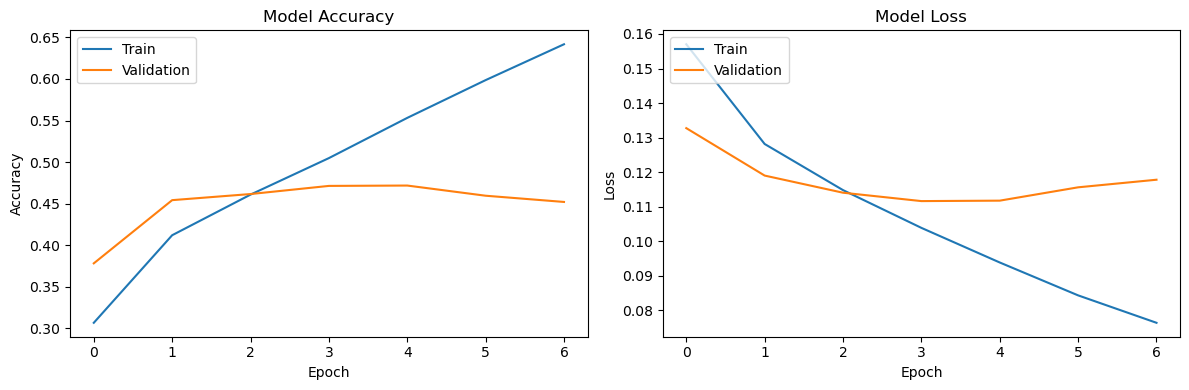

In [16]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()



In [17]:
model.save('emotion_classification_model.h5')


In [18]:
import pickle

# Save tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
